#Introduction
When i started participating in Kaggle competitions. I started with this problem.I feel this is a very 
easy problem to start learning Data Science. So i thought let me share how i approached this problem. Please feel
free to share your comments. I have used IPython to solve this problem. then converted ipython notebook into html file. So if you feel the UI of this page is screwed up. you can see this notebook here 

The Problem Statement is very simple. By seeing some example data about people who survived and who died in Titanic,we need to predict that given a new person's data , wether that person will be saved or not. You can read more about this problem statement <a href='https://www.kaggle.com/c/titanic'>here</a>


Let us Start the fun now. First we will import some libraries

##Some Imports

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

we have imported pandas, numpy, sklearn and matplotlib
pandas is a great library to load and do EDA on data. sklearn will help us in different transformations and 
creating a model. matplotlib help us ploting data for visulaizations. 

"%matplotlib inline" is a magic function in IPython. it helps us intialize matplotlib and display created plots 
in the notebook itself instead of a separate window. 

##Read Data

Let us Now read the csv files

In [8]:
df = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

##Start Exploring

To get some information about loaded data, type following

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


To get basic parameters about different variables call describe function.

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Data Ploting as part of Exploration

###Survived vs Died

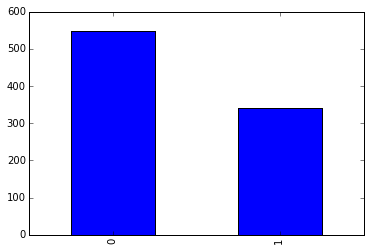

In [11]:
df.Survived.value_counts().plot(kind='bar')

###No of Males vs Females

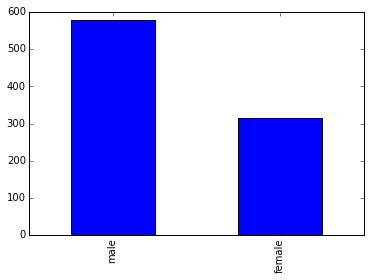

In [12]:
df.Sex.value_counts().plot(kind='bar')

###No of people who boarded from different points

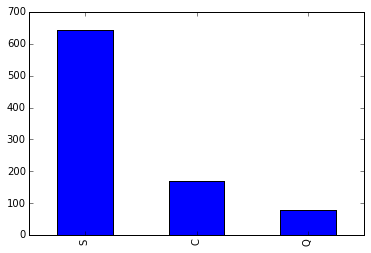

In [13]:
df.Embarked.value_counts().plot(kind='bar')

###No of people in different classes

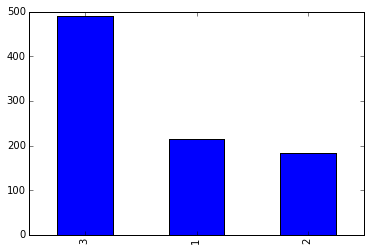

In [16]:
df.Pclass.value_counts().plot(kind='bar')

###Age distribution

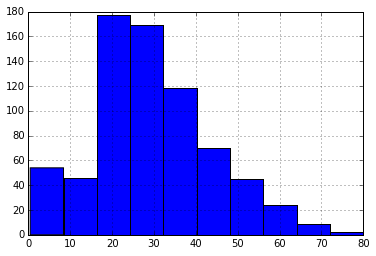

In [17]:
df.Age.hist()

## Exploring Relationship between two variables

### How many people survived in different classes

In [18]:
pclass_crosstab = pd.crosstab(df.Pclass,df.Survived)
pclass_crosstab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


####Lets explore by percentage

In [19]:
pclass_pct = pclass_crosstab.div(pclass_crosstab.sum(1).astype(float) , axis=0)
pclass_pct


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


####Lets Visualize the cross tab table

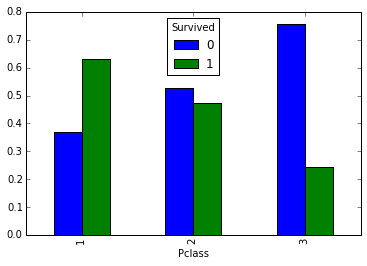

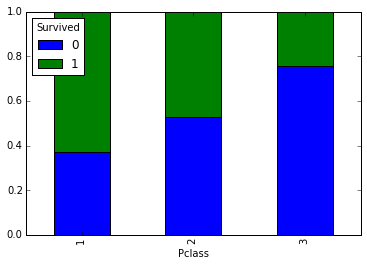

In [20]:
pclass_pct.plot(kind='bar')
pclass_pct.plot(kind='bar' , stacked=True)

###Exploring how much gender played any part in saving peoples

First get unique genders and the map the gender column to gender_map.male will be converted to 1 and female to 0.

In [22]:
gend_mapping = dict(zip(np.sort(df.Sex.unique()), range(len(df.Sex.unique()))))

In [23]:
df['gend_map']= df.Sex.map(gend_mapping).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gend_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


### Gender vs Survival Analysis

In [25]:
gend_crosstab = pd.crosstab(df.gend_map , df.Survived)
gend_pct = gend_crosstab.div(gend_crosstab.sum(1).astype(float) , axis=0)

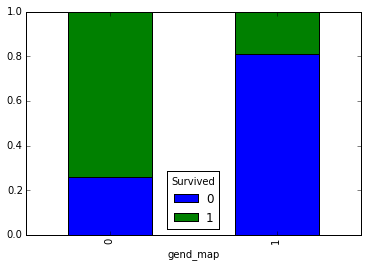

In [26]:
gend_pct.plot(kind='bar' , stacked = True)

##Analyze Combined effect of gender and class on Survival output

In [28]:
#count number of males and females in each class
uniq_pclass = df.Pclass.unique()
print(uniq_pclass)
print("Males in 1st class : ",len(df[(df.Sex == 'male') & (df.Pclass == 1)]))
print("Females in 1st class : ",len(df[(df.Sex == 'female') & (df.Pclass == 1)]))
print("Males in 2nd class : ",len(df[(df.Sex == 'male') & (df.Pclass == 2)]))
print("Females in 2nd class : ",len(df[(df.Sex == 'female') & (df.Pclass == 2)]))
print("Males in 3rd class : ",len(df[(df.Sex == 'male') & (df.Pclass == 3)]))
print("Females in 3rd class : ",len(df[(df.Sex == 'female') & (df.Pclass == 3)]))
#for p_class in uniq_pclass :
    

[3 1 2]
Males in 1st class :  122
Females in 1st class :  94
Males in 2nd class :  108
Females in 2nd class :  76
Males in 3rd class :  347
Females in 3rd class :  144


####Get only Female data

In [32]:
#female Survival plot by class
female_df = df[df.Sex == 'female']

female_df_crtb = pd.crosstab(female_df.Pclass,female_df.Survived)
female_df_crtb = female_df_crtb.div(female_df_crtb.sum(axis=1).astype(float),axis=0)

###Analyze how female survival rate was affected by Passenger class

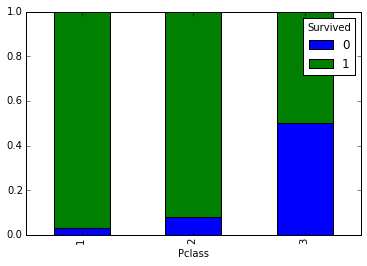

In [33]:
female_df_crtb.plot(kind='bar', stacked=True)

So Majority of First class and Second class passenger females were saved, while comparatively fewer number of
females from 3rd class were saved. 


###Analyze how male survival rate was affected by Passenger class

####Select only Male data and plot

In [36]:
male_df = df[df.Sex == 'male']
male_df_crtb=pd.crosstab(male_df.Pclass,male_df.Survived)
male_df_crtb=male_df_crtb.div(male_df_crtb.sum(axis=1).astype(float), axis=0)

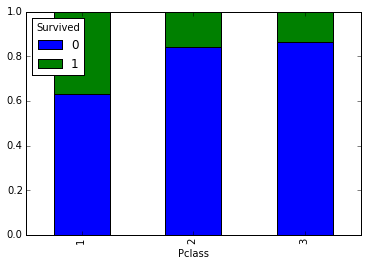

In [37]:
male_df_crtb.plot(kind='bar' , stacked=True)

###Handling Null values

#### Let us see how many null values Embarked column has

In [39]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gend_map
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN,0


###Encode Categorical variable embarked to numerical values instead of text values

In [40]:
#Encode Embarked column
embark_uniq = np.sort(df.Embarked.astype(str).unique())
embark_enc = dict(zip(embark_uniq,range(len(embark_uniq))))
embark_enc

{'C': 0, 'Q': 1, 'S': 2, 'nan': 3}

####Create new Encoded column Embarked_map 

In [41]:
df['Embarked_map'] = df.Embarked.map(embark_enc)

#### From where most of people started their Journey? 

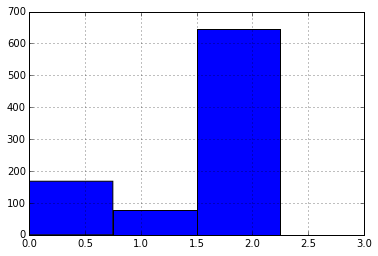

In [42]:
df.Embarked_map.hist(bins=len(embark_uniq),range=(0,3))

####Replace null values with most frequent ouccurence

In [43]:
df.Embarked_map[df.Embarked_map.isnull()]

61    NaN
829   NaN
Name: Embarked_map, dtype: float64

In [44]:
df.Embarked_map.fillna(2,inplace=True)

In [45]:
df.Embarked_map[df.Embarked_map.isnull()]

Series([], Name: Embarked_map, dtype: float64)

In [46]:
df.Embarked[df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [47]:
df.Embarked.fillna('S',inplace=True)

In [48]:
df.Embarked[df.Embarked.isnull()]

Series([], Name: Embarked, dtype: object)

In [49]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

#To Be Continued...